In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

# INTRODUCTION #

Le jeu de données du projet French Industry est composé de données publiées par l'INSEE, réparties sur 4 tables :

- géographie
- démographie des entreprises
- salaires
- populations.

Le lien entre ces 4 tables est le code géographique communale de l'INSEE. Code à partir duquel on peut déterminer la localisation gps ainsi que toutes les appartenances à des zones administratives (régions, départements, etc.)

Datant de 2014, le jeu a été réactualisé par nos soins avec des données publiées en 2020, dernière année pour laquelle nous pouvions regrouper l'ensemble des variables à l'indentique.

Le jeu de données contient près de 35.000 communes.  
En revanche, les données de salaires ne concernent qu'environ 5000 communes.  
Pourquoi ? Car les données salariales sont soumises à un secret statistique de l'INSEE : 

**"Aucune statistique n'est diffusée pour les zones de moins de 2 000 habitants. Pour quelques zones de 2 000 habitants ou plus, qui ne respectent pas les seuils, il n'est pas non plus possible de diffuser des résultats. À savoir, chaque case du tableau doit comporter au moins 5 salariés et aucun salarié ne doit représenter plus de 80% de la masse salariale de la case."**

Par conséquent, notre étude salariale sera limitée à ces conditions.

# AXES DU PROJET #

- inégalités de salaires homme/femme
- inégalités de salaires jeunes/seniors
- inégalités de la répartition du tissu économique sur le territoire

### Est-ce qu'un ratio nombre d'entreprise /population élevé a un effet positif sur les salaires d'une commune? ###

In [2]:
dtypes_dic = pd.read_csv('variables_2020_dtypes.csv')
dtypes_dic = dict(zip(dtypes_dic['Variables'], dtypes_dic['Datatypes']))
df = pd.read_csv('../all_content_2020.csv', dtype=dtypes_dic)
df.head()

,Unnamed: 0,CODGEO,SUPERF,reg,dep,libelle,EU_circo,code_chef_lieu,chef_lieu_libelle,LIBELLE_DEP,LIBELLE_REG,Code_postal,latitude,longitude,PTOT,ETTOT20,ETAZ20,ETBE20,ETFZ20,ETGU20,ETGZ20,ETOQ20,ETTEF020,ETAZ020,ETBE020,ETFZ020,ETGU020,ETGZ020,ETOQ020,ETTEF120,ETAZ120,ETBE120,ETFZ120,ETGU120,ETGZ120,ETOQ120,ETTEF1020,ETAZ1020,ETBE1020,ETFZ1020,ETGU1020,ETGZ1020,ETOQ1020,ETTEF2020,ETAZ2020,ETBE2020,ETFZ2020,ETGU2020,ETGZ2020,ETOQ2020,ETTEF5020,ETAZ5020,ETBE5020,ETFZ5020,ETGU5020,ETGZ5020,ETOQ5020,ETPTOT20,ETPAZ20,ETPBE20,ETPFZ20,ETPGU20,ETPGZ20,ETPOQ20,ETPTEF120,ETPAZ120,ETPBE120,ETPFZ120,ETPGU120,ETPGZ120,ETPOQ120,ETPTEF1020,ETPAZ1020,ETPBE1020,ETPFZ1020,ETPGU1020,ETPGZ1020,ETPOQ1020,ETPTEF2020,ETPAZ2020,ETPBE2020,ETPFZ2020,ETPGU2020,ETPGZ2020,ETPOQ2020,ETPTEF5020,ETPAZ5020,ETPBE5020,ETPFZ5020,ETPGU5020,ETPGZ5020,ETPOQ5020,ETPTEFCP20,ETPAZCP20,ETPBECP20,ETPFZCP20,ETPGUCP20,ETPGZCP20,ETPOQCP20,ETPRES20,ETNPRES20,ETPRESPUB20,ETNPRESPUB20,ETPPRES20,ETPNPRES20,ETPPRESPUB20,ETPNPRESPUB20,ETASSMAT20,ETAUTRES20,SNHM20,SNHMC20,SNHMP20,SNHME20,SNHMO20,SNHMF20,SNHMFC20,SNHMFP20,SNHMFE20,SNHMFO20,SNHMH20,SNHMHC20,SNHMHP20,SNHMHE20,SNHMHO20,SNHM1820,SNHM2620,SNHM5020,SNHMF1820,SNHMF2620,SNHMF5020,SNHMH1820,SNHMH2620,SNHMH5020
0,0,01001,15.95,84,01,L'Abergement-Clémenciat,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,1400,46.153721,4.925850,821.0,14.0,2.0,0.0,3.0,7.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,12.0,2.0,0.0,3.0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,10.0,0.0,13.0,10.0,3.0,14.0,47.0,10.0,0.0,13.0,10.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,2.0,0.0,33.0,14.0,14.0,0.0,34.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,01002,9.15,84,01,L'Abergement-de-Varey,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,1640,46.009606,5.428088,268.0,4.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,4.0,0.0,3.0,8.0,1.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,3.0,5.0,3.0,0.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,01004,24.60,84,01,Ambérieu-en-Bugey,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,1500,45.961049,5.372275,14662.0,586.0,1.0,31.0,58.0,410.0,163.0,86.0,36.0,0.0,1.0,2.0,30.0,9.0,3.0,419.0,1.0,15.0,46.0,312.0,126.0,45.0,69.0,0.0,9.0,7.0,33.0,15.0,20.0,41.0,0.0,4.0,2.0,25.0,11.0,10.0,21.0,0.0,2.0,1.0,10.0,2.0,8.0,5768.0,1.0,477.0,385.0,3175.0,1241.0,1730.0,1330.0,1.0,65.0,133.0,1020.0,452.0,111.0,919.0,0.0,132.0,94.0,442.0,191.0,251.0,1260.0,0.0,125.0,67.0,767.0,331.0,301.0,976.0,0.0,155.0,91.0,427.0,95.0,303.0,1283.0,0.0,0.0,0.0,519.0,172.0,764.0,462.0,124.0,20.0,0.0,4546.0,1222.0,912.0,0.0,475.0,289.0,15.013132,25.221939,16.950395,11.259209,11.772666,13.043695,21.80658,14.36813,11.045518,10.763804,16.202197,26.693345,18.274408,11.761411,12.095672,10.880315,15.072711,17.255747,10.291297,13.234401,14.192028,11.286232,16.13062,19.22654
3,3,01005,15.92,84,01,Ambérieux-en-Dombes,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,1330,45.996164,4.911967,1806.0,46.0,2.0,4.0,10.0,23.0,4.0,7.0,8.0,1.0,0.0,1.0,6.0,0.0,0.0,33.0,1.0,2.0,9.0,17.0,4.0,4.0,5.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171.0,1.0,39.0,28.0,55.0,18.0,48.0,98.0,1.0,9.0,28.0,55.0,18.0,5.0,73.0,0.0,30.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,10.0,2.0,0.0,132.0,39.0,28.0,0.0,60.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,01006,5.88,84,01,Ambléon,Sud-Est,69123,Lyon,Ain,Auvergne-Rhône-Alpes,1300,45.749886,5.594585,113.0,2.0,

In [3]:
#Réduit le dataset aux communes affichant des salaires
df_salaires = df[df['SNHM20'].isna() == False].reset_index(drop=True)

In [4]:
#Dataframe avec commune, population, nombre d'entreprises et salaire net moyen
data = df_salaires[['CODGEO', 'libelle', 'EU_circo', 'reg', 'dep', 'SNHM20', 'ETTOT20','ETPTEFCP20', 'PTOT']].reset_index(drop=True)

In [5]:
#Ajout d'une colonne ratio nb d'entreprises / population
data['ratio_ets_pop'] = data.ETTOT20 / data.PTOT 

In [6]:
#Vérification du dataframe
data.sort_values(by='ratio_ets_pop', ascending=False).head()

,CODGEO,libelle,EU_circo,reg,dep,SNHM20,ETTOT20,ETPTEFCP20,PTOT,ratio_ets_pop
4168,75108,Paris 8e Arrondissement,Île-de-France,11,75,41.694619,21566.0,93981.0,36218.0,0.595450
4161,75101,Paris 1er Arrondissement,Île-de-France,11,75,31.066547,6378.0,40282.0,16149.0,0.394947
4162,75102,Paris 2e Arrondissement,Île-de-France,11,75,29.916381,6845.0,23869.0,21277.0,0.321709
4706,83119,Saint-Tropez,Sud-Est,93,83,16.844661,931.0,616.0,3669.0,0.253748
5315,95527,Roissy-en-France,Île-de-France,11,95,23.500328,702.0,30888.0,2817.0,0.249201


In [7]:
data.corr()

,reg,SNHM20,ETTOT20,ETPTEFCP20,PTOT,ratio_ets_pop
reg,1.000000,-0.144456,-0.035175,-0.058008,-0.055778,0.111351
SNHM20,-0.144456,1.000000,0.123968,0.134942,0.105202,0.125691
ETTOT20,-0.035175,0.123968,1.000000,0.960062,0.934871,0.161956
ETPTEFCP20,-0.058008,0.134942,0.960062,1.000000,0.950474,0.150369
PTOT,-0.055778,0.105202,0.934871,0.950474,1.000000,0.072402
ratio_ets_pop,0.111351,0.125691,0.161956,0.150369,0.072402,1.000000


In [8]:
data_excl_big_cities = data[data.CODGEO.isin(['75056', '13055', '69123']) == False]

Text(0.5, 1.0, "Nombre d'entreprises vs population en 2020")

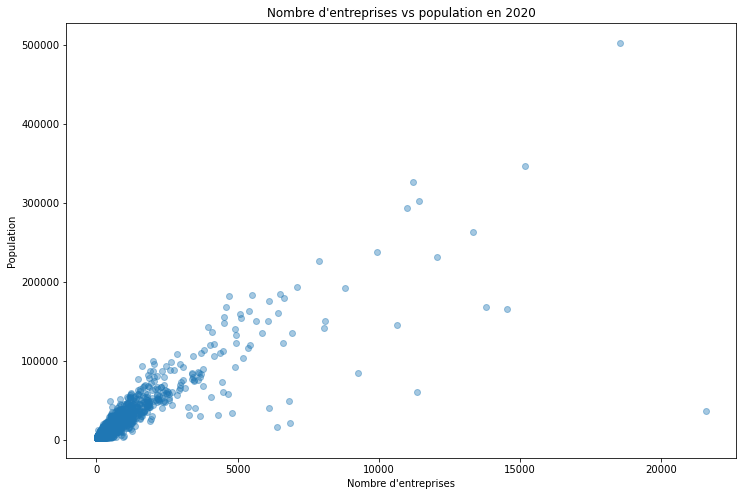

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(data_excl_big_cities.ETTOT20, data_excl_big_cities.PTOT, alpha=0.4)
plt.xlabel("Nombre d'entreprises")
plt.ylabel('Population')
plt.title("Nombre d'entreprises vs population en 2020")

Text(0.5, 1.0, "Ratio d'entreprises vs Salaires")

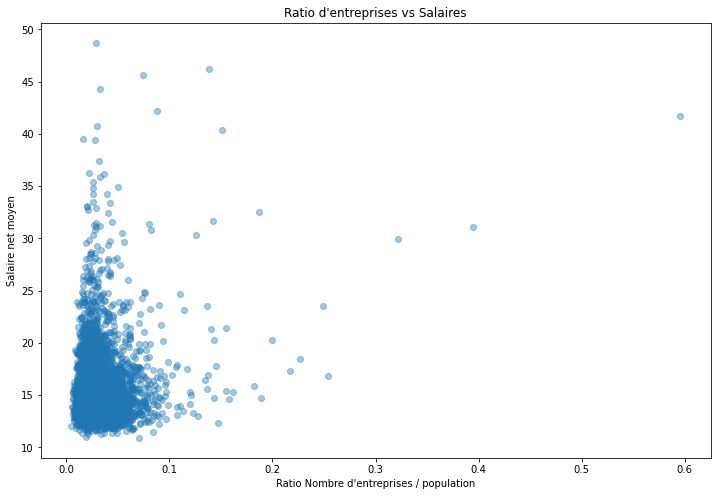

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(data_excl_big_cities.ratio_ets_pop, data_excl_big_cities.SNHM20, alpha=0.4)
plt.xlabel("Ratio Nombre d'entreprises / population")
plt.ylabel('Salaire net moyen')
plt.title("Ratio d'entreprises vs Salaires")

# Les plus grands salaires sont-ils dans les plus grandes agglos? #

In [11]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()

Loading BokehJS ...

In [12]:
src = ColumnDataSource(data_excl_big_cities)

p = figure(plot_width=800, plot_height=800)
g = p.circle(source=src, x='PTOT', y='SNHM20', fill_alpha=0.4, legend='EU_circo')
tooltips = [('Commune', '@libelle')]
h = HoverTool(tooltips=tooltips, renderers = [g])
p.add_tools(h)
show(p)

Text(0.5, 1.0, 'Population vs Salaires')

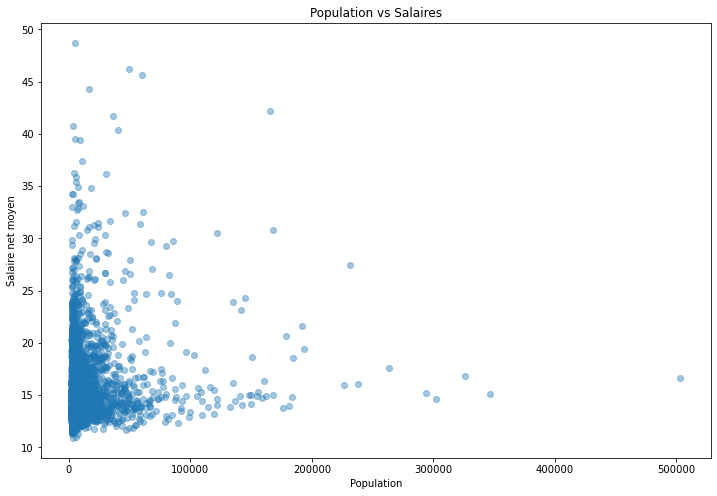

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(data_excl_big_cities.PTOT, data_excl_big_cities.SNHM20, alpha=0.4)
plt.xlabel("Population")
plt.ylabel('Salaire net moyen')
plt.title("Population vs Salaires")

# Salaire moyens par grande région, région et département #

In [14]:
#moyenne pondérée :
import numpy as np


for i in data_excl_big_cities.EU_circo.unique():
    data_func = data_excl_big_cities[data_excl_big_cities['EU_circo'] == i]
    moyenne_pond =  np.average(data_func.SNHM20, weights=data_func.PTOT)
    print('Grande région {} : {}'.format(i, moyenne_pond))
          
         

Grande région Sud-Est : 15.730357657968023
Grande région Nord-Ouest : 14.623762268050296
Grande région Est : 14.39450439660092
Grande région Sud-Ouest : 14.922791065541196
Grande région Centre : 14.819468955070192
Grande région Ouest : 14.851207477794583
Grande région Île-de-France : 20.60043425189695
Grande région Outre-Mer : 14.22201781637007


In [15]:

for i in data_excl_big_cities.reg.unique():
    data_func = data_excl_big_cities[data_excl_big_cities['reg'] == i]
    moyenne_pond =  np.average(data_func.SNHM20, weights=data_func.PTOT)
    print('Région {} : {}'.format(i, moyenne_pond))
          

Région 84 : 15.88332298898836
Région 32 : 14.632676087689077
Région 93 : 15.616469352786732
Région 44 : 14.482430627906565
Région 76 : 14.93481428784217
Région 28 : 14.605202711978357
Région 75 : 14.909721644697461
Région 24 : 14.819468955070192
Région 27 : 14.17430510315339
Région 53 : 14.794848963374898
Région 94 : 14.156951932124052
Région 52 : 14.89848629017644
Région 11 : 20.60043425189695
Région 1 : 14.813244870514904
Région 2 : 14.763440774007023
Région 3 : 14.611886010908341
Région 4 : 13.634853693057005


In [16]:
dep_list = []
dep_moy_sal = []
for i in data_excl_big_cities.dep.unique():
    data_func = data_excl_big_cities[data_excl_big_cities['dep'] == i]
    moyenne_pond =  np.average(data_func.SNHM20, weights=data_func.PTOT)
    print('Département {} : {}'.format(i, moyenne_pond))
    dep_list.append(i)
    dep_moy_sal.append(moyenne_pond)
          

Département 01 : 15.05908564661603
Département 02 : 13.420947919174253
Département 03 : 13.70742074381866
Département 04 : 14.155388927133181
Département 05 : 13.305632312827276
Département 06 : 16.211055478020445
Département 07 : 14.038033180741344
Département 08 : 13.254779972094672
Département 09 : 13.233974893347023
Département 10 : 13.429918074177012
Département 11 : 13.114011183051563
Département 12 : 13.40857331346867
Département 13 : 16.231228399930284
Département 14 : 14.142009165067634
Département 15 : 12.975534516955573
Département 16 : 14.327860666330945
Département 17 : 14.454561855218435
Département 18 : 13.993107796405528
Département 19 : 13.671620586231953
Département 21 : 14.777779288744842
Département 22 : 14.25658591847065
Département 23 : 12.583935056883647
Département 24 : 13.252413795583951
Département 25 : 14.191784565960102
Département 26 : 14.5502624727779
Département 27 : 14.620940739102174
Département 28 : 14.672712977971502
Département 29 : 14.42602588119070

In [17]:
dep_tot_ets = []
for i in data_excl_big_cities.dep.unique():
    data_func = data_excl_big_cities[data_excl_big_cities['dep'] == i]
    somme =  data_func.ETTOT20.sum()
    print('Département {} : {}'.format(i, somme))
    dep_tot_ets.append(somme)

Département 01 : 13553.0
Département 02 : 7461.0
Département 03 : 6762.0
Département 04 : 4188.0
Département 05 : 3736.0
Département 06 : 45105.0
Département 07 : 6297.0
Département 08 : 4128.0
Département 09 : 3005.0
Département 10 : 5802.0
Département 11 : 8866.0
Département 12 : 6296.0
Département 13 : 73283.0
Département 14 : 17926.0
Département 15 : 2693.0
Département 16 : 7308.0
Département 17 : 17983.0
Département 18 : 5420.0
Département 19 : 5413.0
Département 21 : 11877.0
Département 22 : 14197.0
Département 23 : 1461.0
Département 24 : 7888.0
Département 25 : 10969.0
Département 26 : 14771.0
Département 27 : 9871.0
Département 28 : 7961.0
Département 29 : 24111.0
Département 2A : 6433.0
Département 2B : 6331.0
Département 30 : 20151.0
Département 31 : 41161.0
Département 32 : 3709.0
Département 33 : 50714.0
Département 34 : 39778.0
Département 35 : 30402.0
Département 36 : 4002.0
Département 37 : 14700.0
Département 38 : 33054.0
Département 39 : 4511.0
Département 40 : 10005.

In [18]:
dep_tot_ets_100 = []
for i in data_excl_big_cities.dep.unique():
    data_func = data_excl_big_cities[data_excl_big_cities['dep'] == i]
    somme =  data_func.ETPTEFCP20.sum()
    print('Département {} : {}'.format(i, somme))
    dep_tot_ets_100.append(somme)

Département 01 : 47602.0
Département 02 : 40392.0
Département 03 : 30156.0
Département 04 : 11708.0
Département 05 : 9541.0
Département 06 : 147645.0
Département 07 : 24680.0
Département 08 : 19276.0
Département 09 : 9228.0
Département 10 : 29599.0
Département 11 : 27801.0
Département 12 : 18974.0
Département 13 : 349417.0
Département 14 : 93119.0
Département 15 : 10162.0
Département 16 : 33251.0
Département 17 : 51566.0
Département 18 : 29638.0
Département 19 : 20015.0
Département 21 : 81269.0
Département 22 : 63467.0
Département 23 : 5756.0
Département 24 : 30724.0
Département 25 : 65908.0
Département 26 : 60977.0
Département 27 : 53688.0
Département 28 : 41098.0
Département 29 : 115187.0
Département 2A : 18855.0
Département 2B : 11704.0
Département 30 : 69239.0
Département 31 : 287759.0
Département 32 : 11973.0
Département 33 : 254331.0
Département 34 : 154552.0
Département 35 : 181757.0
Département 36 : 18154.0
Département 37 : 82177.0
Département 38 : 181859.0
Département 39 : 218

In [19]:
dep_analysis = pd.DataFrame({'dep': dep_list, 'moy_sal': dep_moy_sal, 'tot_ets': dep_tot_ets, 'tot_ets_100': dep_tot_ets_100})

In [20]:
dep_analysis.corr()

,moy_sal,tot_ets,tot_ets_100
moy_sal,1.000000,0.777265,0.85616
tot_ets,0.777265,1.000000,0.92148
tot_ets_100,0.856160,0.921480,1.00000


Text(0.5, 1.0, "Corrélation entre salaire et nombre d'établissements par département")

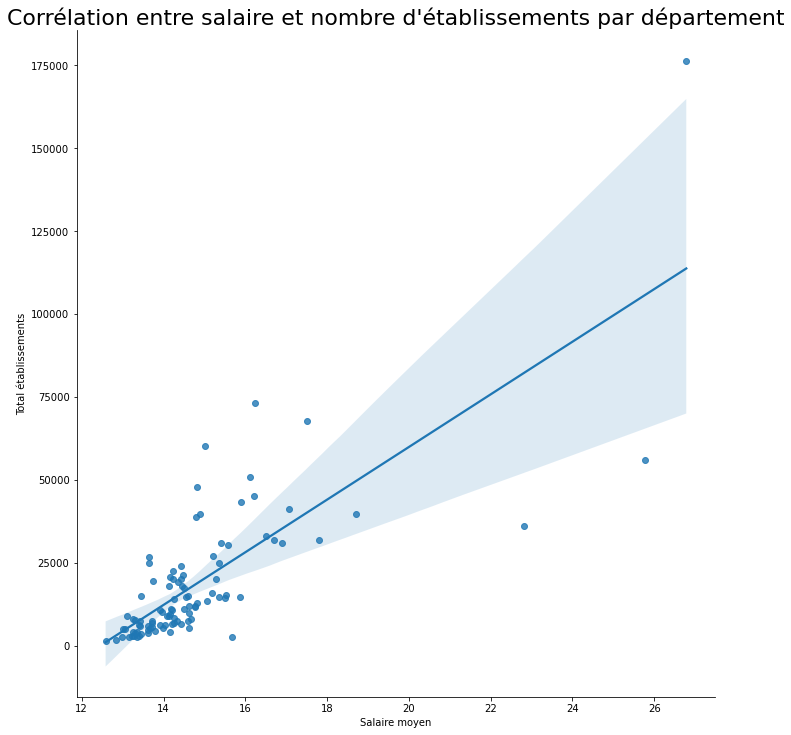

In [25]:
import seaborn as sns

sns.lmplot(data=dep_analysis, x='moy_sal', 
                y='tot_ets', 
                height=10, 
                aspect=1,
                )

plt.xlabel('Salaire moyen')
plt.ylabel('Total établissements')
plt.title('Corrélation entre salaire et nombre d\'établissements par département', fontsize=22)

Text(0.5, 1.0, "Corrélation entre salaire et nombre d'établissements de + de 100 employés par département")

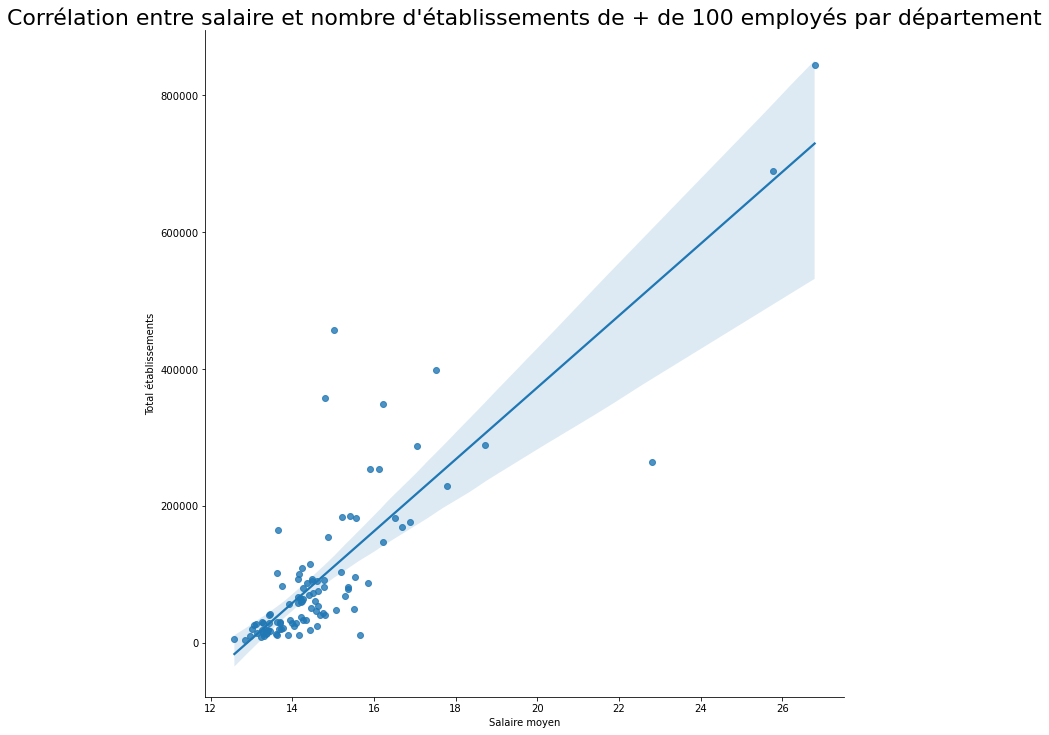

In [22]:
import seaborn as sns

ax = sns.lmplot(data=dep_analysis, x='moy_sal', 
                y='tot_ets_100', 
                height=10, 
                aspect=1,
                )

plt.xlabel('Salaire moyen')
plt.ylabel('Total établissements')
plt.title('Corrélation entre salaire et nombre d\'établissements de + de 100 employés par département', fontsize=22)